In [36]:
%config FileContentsManager.autosave_interval = 30000  

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
#downloading data 
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


--2024-10-27 07:28:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   1.41M  5.17MB/s    in 0.3s    

2024-10-27 07:28:01 (5.17 MB/s) - ‘data.csv.3’ saved [1475504/1475504]



In [39]:
#reading data
def wrangle(filepath):
    df=pd.read_csv(filepath)

    return df

In [40]:
df=wrangle("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [41]:
#Changing our column names beacause they aint consistent
df.columns=df.columns.str.lower().str.replace(" ","_")

In [42]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [43]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [44]:
strings=list(df.dtypes[df.dtypes=="object"].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [45]:
for col in strings:
    df[col]=df[col].str.lower().str.replace(" ", "_")

In [46]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Exploitory Data Analysis

In [47]:
for col in df.columns:
    print (col)
    print(df[col].unique()[:3])
    print()

make
['bmw' 'audi' 'fiat']

model
['1_series_m' '1_series' '100']

year
[2011 2012 2013]

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']

engine_hp
[335. 300. 230.]

engine_cylinders
[6. 4. 5.]

transmission_type
['manual' 'automatic' 'automated_manual']

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']

number_of_doors
[2. 4. 3.]

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']

vehicle_size
['compact' 'midsize' 'large']

vehicle_style
['coupe' 'convertible' 'sedan']

highway_mpg
[26 28 27]

city_mpg
[19 20 18]

popularity
[3916 3105  819]

msrp
[46135 40650 36350]



Distribution of Car Prices

In [48]:
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

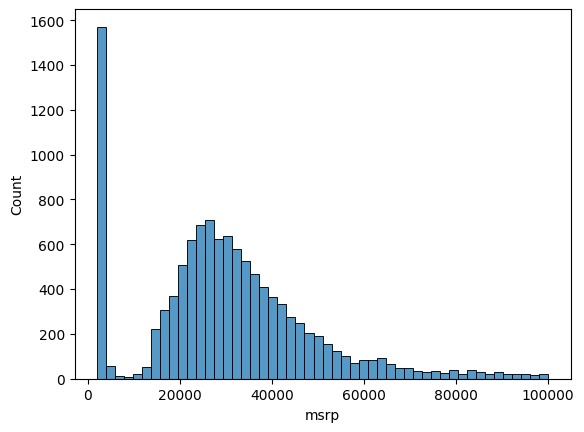

In [49]:
sns.histplot(df.msrp[df.msrp<100_000], bins=50);

In [50]:
np.log1p([1,10,1000,100000])

array([ 0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [51]:
price_logs=np.log1p(df.msrp)

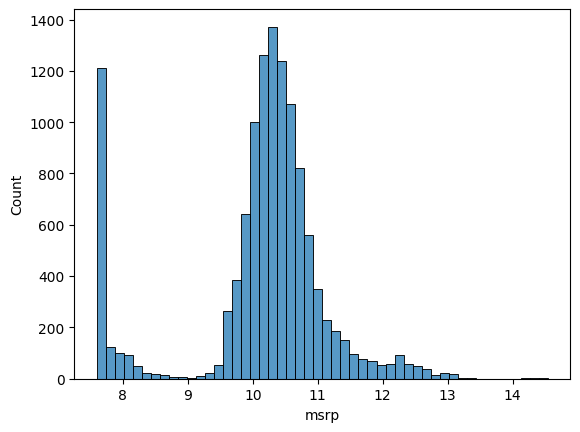

In [52]:
sns.histplot(price_logs, bins=50);

Missing Values


In [53]:
df.isnull().sum()/len(df)*100

make                  0.000000
model                 0.000000
year                  0.000000
engine_fuel_type      0.025180
engine_hp             0.579151
engine_cylinders      0.251805
transmission_type     0.000000
driven_wheels         0.000000
number_of_doors       0.050361
market_category      31.408427
vehicle_size          0.000000
vehicle_style         0.000000
highway_mpg           0.000000
city_mpg              0.000000
popularity            0.000000
msrp                  0.000000
dtype: float64

In [64]:
len(df)

11914

Setting Up the Validation Framework

In [68]:
n=len(df)
n_test=int(n*0.2)
n_val=int(n*0.2)
n_train=n-n_test-n_val

In [71]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [55]:
df_train=df.iloc[n_train:]
df_val=df.iloc[n_train:n_train+n_val]
df_test=df.iloc[n_val:n_val+n_test]

In [76]:
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [77]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [80]:
df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_val+n_train:]]

In [81]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [82]:
#Reeseting indexes
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


In [84]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [85]:
#Applying logarithmic transormation
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [86]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]


<strong>Linear Regression</strong>

In [97]:
xi=[453, 11, 86]
wo=7.17
w=[0.1,0.001,0.2]

In [98]:
def linear_regression(xi):
    n=len(xi)
    pred=wo
    for i in range (n):
        pred=pred+w[i]*xi[i]
        return pred
       

In [99]:
linear_regression(xi)

52.470000000000006

In [101]:
#Applying logarthmic
np.expm1(52.47)

np.float64(6.1295905553157645e+22)

Training a linear Regression Model

In [109]:
x=[[22,33,44,55],
   [45,56,78,54],
   [77,44,21,35],
  [44,68,90,321],]


array([1., 1., 1., 1.])

In [123]:
x=np.array(x)
x

array([[ 22,  33,  44,  55],
       [ 45,  56,  78,  54],
       [ 77,  44,  21,  35],
       [ 44,  68,  90, 321]])

In [124]:
ones=np.ones(x.shape[0])
ones

array([1., 1., 1., 1.])

In [125]:
x=np.column_stack([ones,x])

In [126]:
XTX=x.T.dot(x)

In [127]:
XTX

array([[4.00000e+00, 1.88000e+02, 2.01000e+02, 2.33000e+02, 4.65000e+02],
       [1.88000e+02, 1.03740e+04, 9.62600e+03, 1.00550e+04, 2.04590e+04],
       [2.01000e+02, 9.62600e+03, 1.07850e+04, 1.28640e+04, 2.82070e+04],
       [2.33000e+02, 1.00550e+04, 1.28640e+04, 1.65610e+04, 3.62570e+04],
       [4.65000e+02, 2.04590e+04, 2.82070e+04, 3.62570e+04, 1.10207e+05]])

In [128]:
XTX_inv=np.linalg.inv(XTX)

In [129]:
#To find identity matrix
XTX.dot(XTX_inv).round(1)

array([[ 1. , -0. ,  0. , -0. , -0. ],
       [ 0.6,  0.8, -0.1, -0.2,  0. ],
       [ 4.4,  0.1,  0.5,  0. ,  0. ],
       [-2.7, -0.7,  1.1,  0.4, -0. ],
       [ 4.4,  0.1, -0.8, -0.3,  1. ]])

In [133]:
y=[300,44,444,677,555]

In [136]:
w_full=XTX_inv.dot(XTX).dot(y)
w_full

array([-68156.91333008,  -1810.04695129,   1744.03492737,    109.47486496,
          535.90402687])

In [137]:
wo=w_full[0]
w=w_full[1:]

In [138]:
wo, w

(np.float64(-68156.91333007812),
 array([-1810.04695129,  1744.03492737,   109.47486496,   535.90402687]))

In [149]:
#putting everything in a function

def train_linear_regression(x, y):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])  
    XTX = x.T.dot(x)
    
    alpha = 1e-5
    XTX += alpha * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(x.T).dot(y)
    
    return w_full[0], w_full[1:]



In [150]:
train_linear_regression(x,y)

(np.float64(749.8358499622555), array([-386.3456355 ,  363.49021301]))

<strong>Car Price Baseline Model</strong>

In [152]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [153]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [158]:
base=['engine_hp',
 'engine_cylinders',
 
 'highway_mpg',
 'city_mpg',
 'popularity'
     ]
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [159]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [165]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [174]:
#lets fill null values with zeros
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [177]:
x_train=df_train[base].values

In [178]:
x_train=df_train[base].fillna(0).values

In [179]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [181]:
wo, w=train_linear_regression(x_train,y_train)

In [182]:
pred=wo+x_train.dot(w)
pred

array([ 9.5479278 ,  9.38733974,  9.67197758, ..., 10.3042301 ,
       11.97789163,  9.99863105])

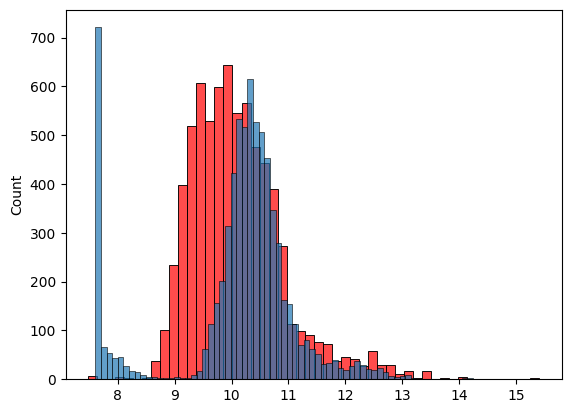

In [184]:
#plotting prediction
sns.histplot(pred, color="red",alpha=0.7, bins=50)
sns.histplot(y_train, alpha=0.7, bins=70);

<strong>RMSE (Root Mean Squared Error)</strong>

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

where:
- \( n \) is the number of observations,
- \( y_i \) is the observed value, and
- \( \hat{y}_i \) is the predicted value.

In [186]:
#Implementing it 
def rmse (y, y_pred):
    error=(y_pred-y)**2
    mse=error.mean()
    return np.sqrt(mse)
    

In [187]:
rmse(y_train, pred)

np.float64(0.7554192603920171)

<strong> Validating the model </strong>

In [221]:
base=['engine_hp',
 'engine_cylinders',
 
 'highway_mpg',
 'city_mpg',
 'popularity'
     ]
x_train=df_train[base].fillna(0).values
wo, w=train_linear_regression(x_train,y_train)
pred=wo+x_train.dot(w)

In [191]:
def prepare (df):
    df_num=df[base]
    df_num=df[base].fillna(0)
    X=df_num.values
    return X

In [193]:
x_train=prepare(df_train)
wo, w=train_linear_regression(x_train,y_train)
x_val=prepare(df_val)
pred=wo+x_val.dot(w)
rmse(y_val, pred)

np.float64(0.7616530971642482)

<strong>Simple Feature Engineering</strong>

In [197]:
2017-df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [208]:
def prepare (df):
    df=df.copy()
    df["age"]=2017-df.year
    features=base+["age"]
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [209]:
x_train=prepare(df_train)

In [211]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [212]:
x_train=prepare(df_train)
wo, w=train_linear_regression(x_train,y_train)
x_val=prepare(df_val)
pred=wo+x_val.dot(w)
rmse(y_val, pred)

np.float64(0.517205549012962)

In [ ]:
# As we can see the model improved

Plotting again to see

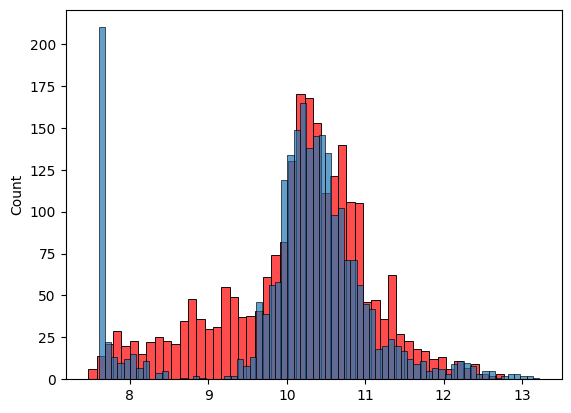

In [213]:
#plotting prediction
sns.histplot(pred, color="red",alpha=0.7, bins=50)
sns.histplot(y_val, alpha=0.7, bins=70);

Categorical Variables

In [214]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [215]:
for v in [2,3,4]:
    df_train["num_doors_%s" % v]=(df_train.number_of_doors==v).astype('int')
    

In [216]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [224]:
#taking our previous function


def prepare(df):
    df=df.copy()
    features=base.copy()
    df["age"] = 2017 - df.year
    features.append('age')
    for v in [2, 3, 4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype('int')
        features.append("num_doors_%s" % v)  

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X  



In [225]:
prepare(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [227]:
#Checking if there will be any improvementt 

x_train=prepare(df_train)
wo, w=train_linear_regression(x_train,y_train)
x_val=prepare(df_val)
pred=wo+x_val.dot(w)
rmse(y_val, pred)

np.float64(0.5157995707256944)

In [232]:
makes=list(df.make.value_counts().head().index)

In [233]:
def prepare(df):
    df=df.copy()
    features=base.copy()
    df["age"] = 2017 - df.year
    features.append('age')
    for v in makes:
        df["make_%s" % v] = (df.make == v).astype('int')
        features.append("make_%s" % v)  

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X  


In [234]:
#Checking if there will be any improvementt 

x_train=prepare(df_train)
wo, w=train_linear_regression(x_train,y_train)
x_val=prepare(df_val)
pred=wo+x_val.dot(w)
rmse(y_val, pred)

np.float64(0.5090963348108928)

In [237]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [244]:
categorical_variables=["engine_fuel_type", "transmission_type" , "driven_wheels", "market_category","vehicle_size", "vehicle_style", "make"]

In [247]:
categories={}
for c in categorical_variables:
    categories[c]=list(df[c].value_counts().head().index)


In [248]:
categories

{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']}

In [257]:
def prepare(df):
    df = df.copy()
    features = base.copy()
    df["age"] = 2017 - df.year
    features.append('age')

    for v in makes:
        df["make_%s" % v] = (df.make == v).astype('int')
        features.append("make_%s" % v)

    for c, values in categories.items():
        for v in values:
            df["%s_%s" % (c, v)] = (df[c] == v).astype('int')
            features.append("%s_%s" % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X



In [258]:
#Checking if there will be any improvementt 

x_train=prepare(df_train)
wo, w=train_linear_regression(x_train,y_train)
x_val=prepare(df_val)
pred=wo+x_val.dot(w)
rmse(y_val, pred)

np.float64(0.45810936206823566)

<strong>Regularization</strong>